# DAML 08 - Classification vs Regression

Michal Grochmal <michal.grochmal@city.ac.uk>

How is *classification* different from *regression*?
Both techniques are supervised,
i.e. require training data to have some kind of labels or values which represent.
It turns out that most classification methods can be used to perform regression
and most regression methods can be used to perform classification.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV

### Logistic Regression

Imagine that we can construct a function from a classification problem,
and then say that values below some point $x$ are from one class and above this point
are from the other class.  That is one way of turning regression into classification,
yet points that are very close to $x$ would be often misclassified.  Instead we could say
that points close to $x$ have a good probability of being from both classes (with a little
higher probability to the class on which side of $x$ the point is) and points away from
it would have a big probability of being of the given class.
This is what logical regression does.

People say that a stew needs to be cooked for a long time to be good.  Lest see if we can
classify stews based on their cooking time and how the people who ate them liked them:

In [2]:
df = pd.DataFrame({
    'cooking time (h)': [0.2, 0.5, 0.6, 0.7, 1.0, 1.2, 1.3, 1.5, 1.9, 2.0, 2.5, 3.0, 3.7, 4.5],
    'satisfied eater':  [  0,   0,   0,   1,   0,   1,   0,   0,   1,   1,   1,   1,   1,   1]})
df

,cooking time (h),satisfied eater
0,0.2,0
1,0.5,0
2,0.6,0
3,0.7,1
4,1.0,0
5,1.2,1
6,1.3,0
7,1.5,0
8,1.9,1
9,2.0,1


In [3]:
model = LogisticRegression()
data = df['cooking time (h)'].values[:, np.newaxis]
y = df['satisfied eater']
cross_val_score(model, data, y)

array([ 0.8,  0.8,  0.5])

In [4]:
model.fit(data, y)
model.predict([[0.3], [2.6]]), model.predict_proba([[0.3], [2.6]])

(array([0, 1]), array([[ 0.63389756,  0.36610244],
        [ 0.19531626,  0.80468374]]))

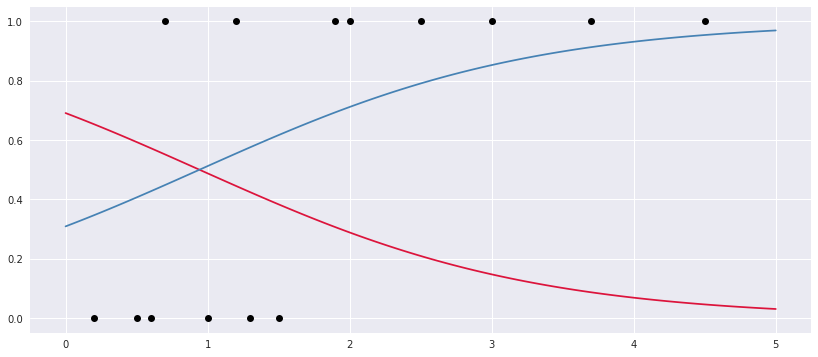

In [5]:
xfit = np.linspace(0, 5, 100)
yfit = model.predict_proba(xfit[:, np.newaxis])
fig, ax = plt.subplots(1, figsize=(14, 6))
ax.plot(xfit, yfit[:, 0], color='crimson')
ax.plot(xfit, yfit[:, 1], color='steelblue')
ax.plot(data, y, 'o', color='black');

### Regression using KNN

On the other hand we can also use a classification technique to perform a regression.
When we count the neighbors in the k nearest neighbors algorithm for classification
we take the class of the majority of neighbors.  But what if, instead of classes we
have real values and we want a regressions?  We could simply take the mean of all the neighbors.
And this is exactly how a regressor based on KNN works.

The foundation depth of a crane depends on what lift it will need to carry, which in turn
depends on the maximum weight and maximum size (in the biggest dimension) of the load it may carry.
Let's try to estimate that foundation.

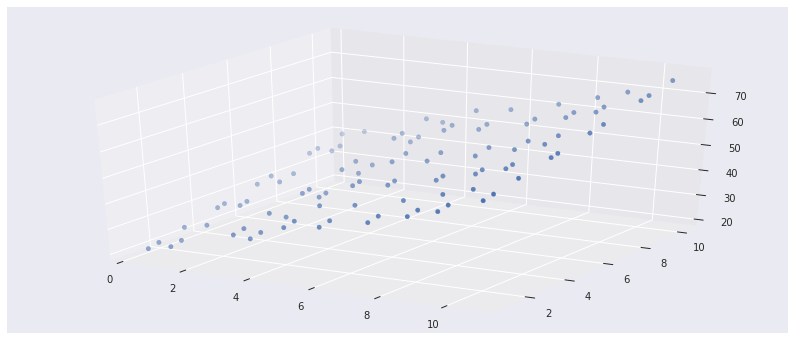

In [6]:
weight = np.linspace(0, 10, 10) + np.random.rand(10)
size = np.linspace(0, 10, 10) + np.random.rand(10)
w, s = np.meshgrid(weight, size)
lift_foundation = w*3 + s*2 + 17 + 7*np.random.rand(10)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(w, s, lift_foundation)
data = np.dstack([w, s]).reshape(100, 2)

In [7]:
model = KNeighborsRegressor(n_neighbors=3)
# R2 scoring is particularly bad for KNN regression
grid = GridSearchCV(model, {'n_neighbors': [3, 4, 5, 6, 7]}, scoring='explained_variance')
grid.fit(data, lift_foundation.reshape(100))
print(grid.best_score_)
grid.best_estimator_

0.906366468189


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

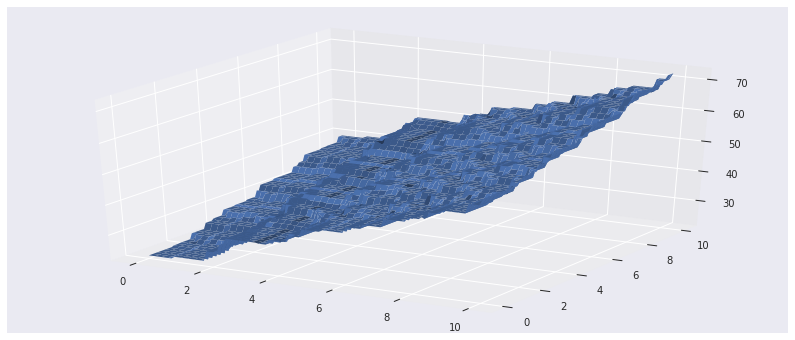

In [8]:
xmesh, ymesh = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 10, 100))
xfit = np.dstack([xmesh, ymesh]).reshape(10000, 2)
model = grid.best_estimator_
yfit = model.fit(data, lift_foundation.reshape(100))
yfit = model.predict(xfit)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xmesh, ymesh, yfit.reshape(100, 100));